In [93]:
import matplotlib.pyplot as plt
from import_fun import HH, syn_sigmoidal, syn_sigmoidal_delay, create_sf, delayer

In [94]:
dt = 0.01
method = 'euler'    # （"euler", "rk4"）
N = 100
tau = 13

In [95]:
conn = create_sf()
delayN = int(tau/dt)
delayee = delayer(N, delayN)

In [96]:
nodes = HH(N, method, dt)
nodes.params_nodes["Iex"] = 20.
# syn = syn_sigmoidal(nodes, nodes, conn, method=method)
syn = syn_sigmoidal_delay(nodes, nodes, conn, method=method, delayer=delayee)
syn.w.fill(0.1)

In [97]:
for i in range(100_00):
    nodes()

for i in range(200_00):
    Isyn = syn()
    nodes(Isyn)

mem = []
time = []
for i in range(200_00):
    Isyn = syn()
    nodes(Isyn)
    mem.append(nodes.vars_nodes[0].copy())
    time.append(nodes.t)


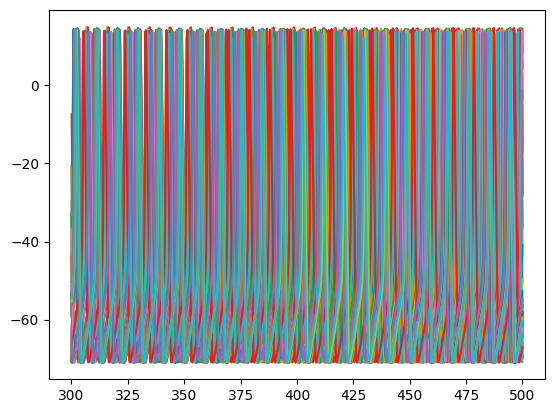

In [98]:
plt.plot(time, mem)
plt.show()